In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('D:\DT\Python_DL_study_project\Data\Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


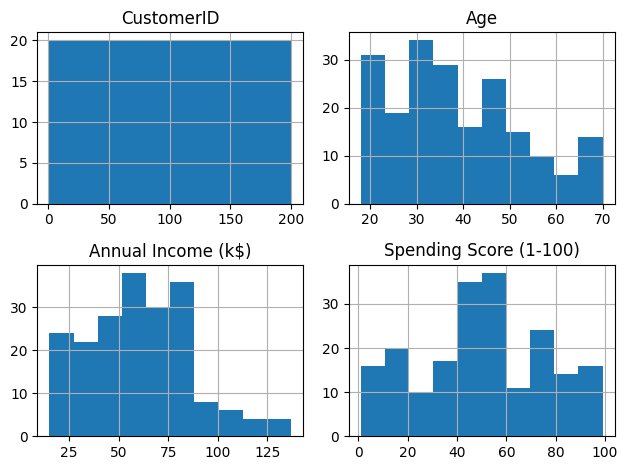

In [6]:
#데이터 분포확인
df.hist()
plt.tight_layout()
plt.show()

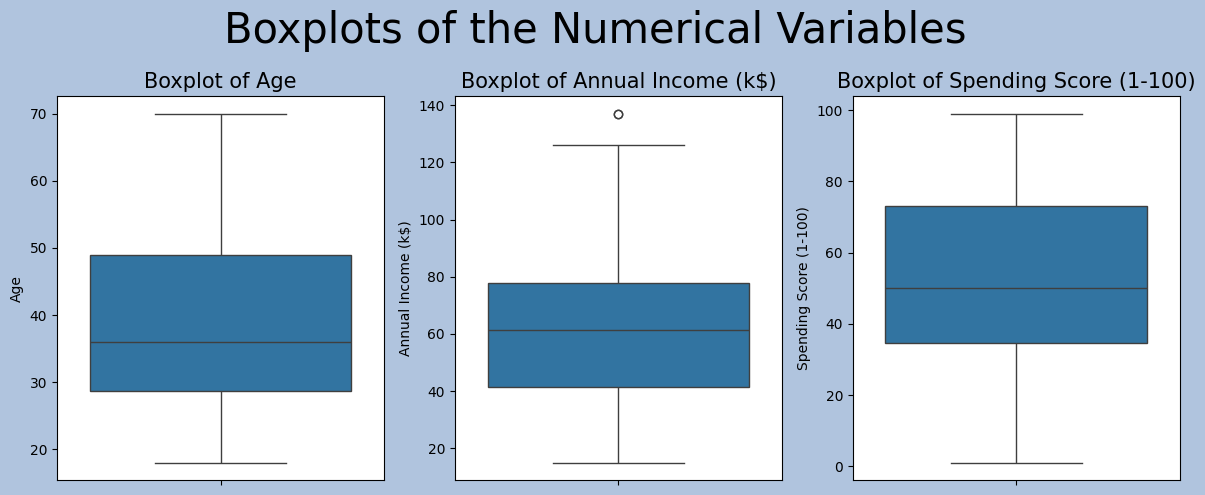

In [7]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,5))

ax1 = sns.boxplot(df[features[0]],ax=ax1)
ax1.set_title('Boxplot of '+str(features[0]),fontsize=15)

ax2 = sns.boxplot(df[features[1]],ax=ax2)
ax2.set_title('Boxplot of '+str(features[1]),fontsize=15)

ax3 = sns.boxplot(df[features[2]],ax=ax3)
ax3.set_title('Boxplot of '+str(features[2]),fontsize=15)

fig.suptitle("Boxplots of the Numerical Variables",fontsize=30)    

plt.tight_layout()
fig.set_facecolor('lightsteelblue')

In [8]:
from scipy.stats import kurtosis,skew
num_features = ['Age','Annual Income (k$)','Spending Score (1-100)']

for col in num_features:

    print(f"Skewness of {col}: {skew(df[col])}")
    print(f"Kurtosis of {col}: {kurtosis(df[col])}")
    print()

Skewness of Age: 0.48191947090957177
Kurtosis of Age: -0.6847513947723236

Skewness of Annual Income (k$): 0.319423684276314
Kurtosis of Annual Income (k$): -0.1258928297475106

Skewness of Spending Score (1-100): -0.04686530945553505
Kurtosis of Spending Score (1-100): -0.8359582718737237



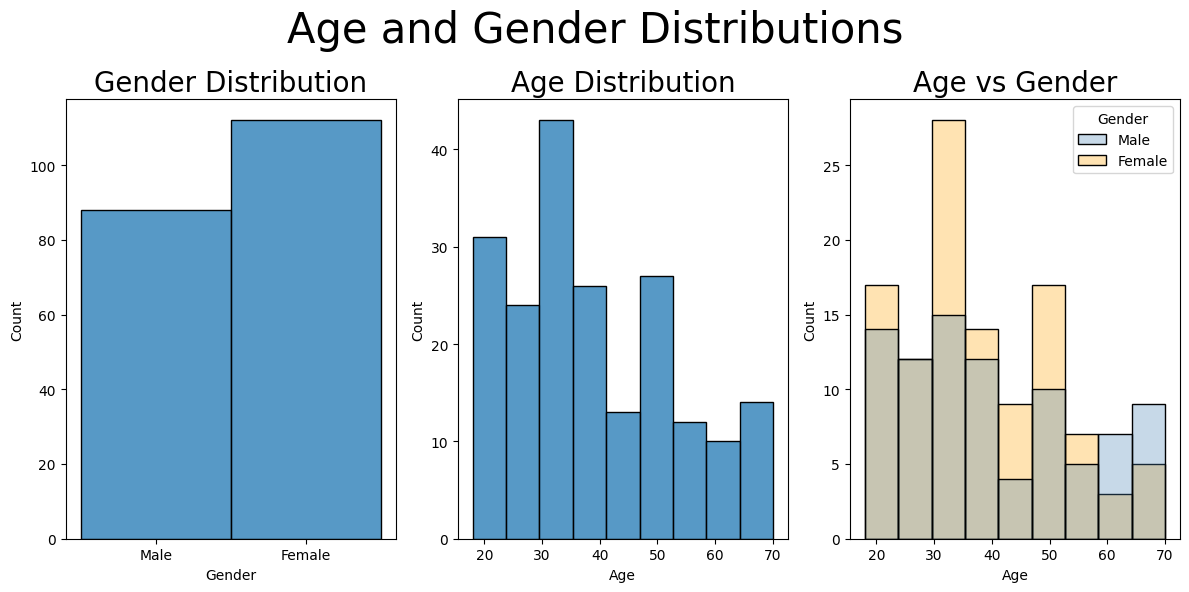

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1 = sns.histplot(data=df,x='Gender',ax=ax1)
ax1.set_title('Gender Distribution',size=20)

ax2 = sns.histplot(data=df,x='Age',ax=ax2)
ax2.set_title('Age Distribution',size=20)

ax3 = sns.histplot(data=df,x='Age',hue='Gender',palette=['steelblue','orange'],alpha=0.3,ax=ax3)
ax3.set_title('Age vs Gender',size=20)

plt.suptitle('Age and Gender Distributions',size=30)

plt.tight_layout()

In [10]:
#평균나이
print(f"Average age = {df['Age'].mean():.0f} +/- {df['Age'].std():.0f}")

print(f"Average age females = {df.loc[df.Gender == 'Female']['Age'].mean():.0f} +/- {df.loc[df.Gender == 'Female']['Age'].std():.0f}")

print(f"Average age males = {df.loc[df.Gender == 'Male']['Age'].mean():.0f} +/- {df.loc[df.Gender == 'Male']['Age'].std():.0f}")

Average age = 39 +/- 14
Average age females = 38 +/- 13
Average age males = 40 +/- 16


In [12]:
#고객아이디삭제제
df2 = df.drop(['CustomerID'], axis =1 )
df2.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
#라벨인코딩
from sklearn.preprocessing import StandardScaler,LabelEncoder
encoder = LabelEncoder()

df2['Gender'] = encoder.fit_transform(df2['Gender'])

df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [14]:
#스케일링링
df2_sc = df2.drop(['Gender'],axis=1)

scaler = StandardScaler()

scaled_columns = df2_sc.columns

df2_sc[scaled_columns] = scaler.fit_transform(df2_sc[scaled_columns])

df2_sc.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [21]:
#kmeans임포트트
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(df2_sc)
# 클러스터 할당 결과 확인
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 2 0 0 0 2 2 2 2 0 2 1 1 0 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1]


d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
from sklearn.metrics import silhouette_score

# Silhouette Score 계산
sil_score = silhouette_score(df2_sc, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.357793388710272


d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

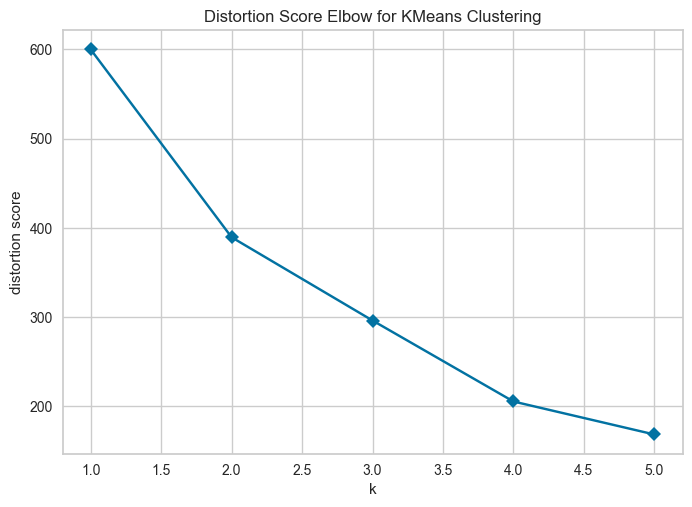

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,6), timings=False)
visualizer.fit(df2_sc)
visualizer.show()

In [32]:
# K-means clustering 수행(k=3로 설정)
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=50, max_iter=500, random_state=42)
clusters = kmeans.fit_predict(df2_sc)

# 클러스터 레이블과 중심점 구하기
predicted_labels = kmeans.labels_
predicted_centers = kmeans.cluster_centers_

In [33]:
# Clustering 결과 데이터프레임에 추가하기
df_result = pd.DataFrame(df2_sc, columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_result['Cluster'] = clusters
df_result

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,2
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


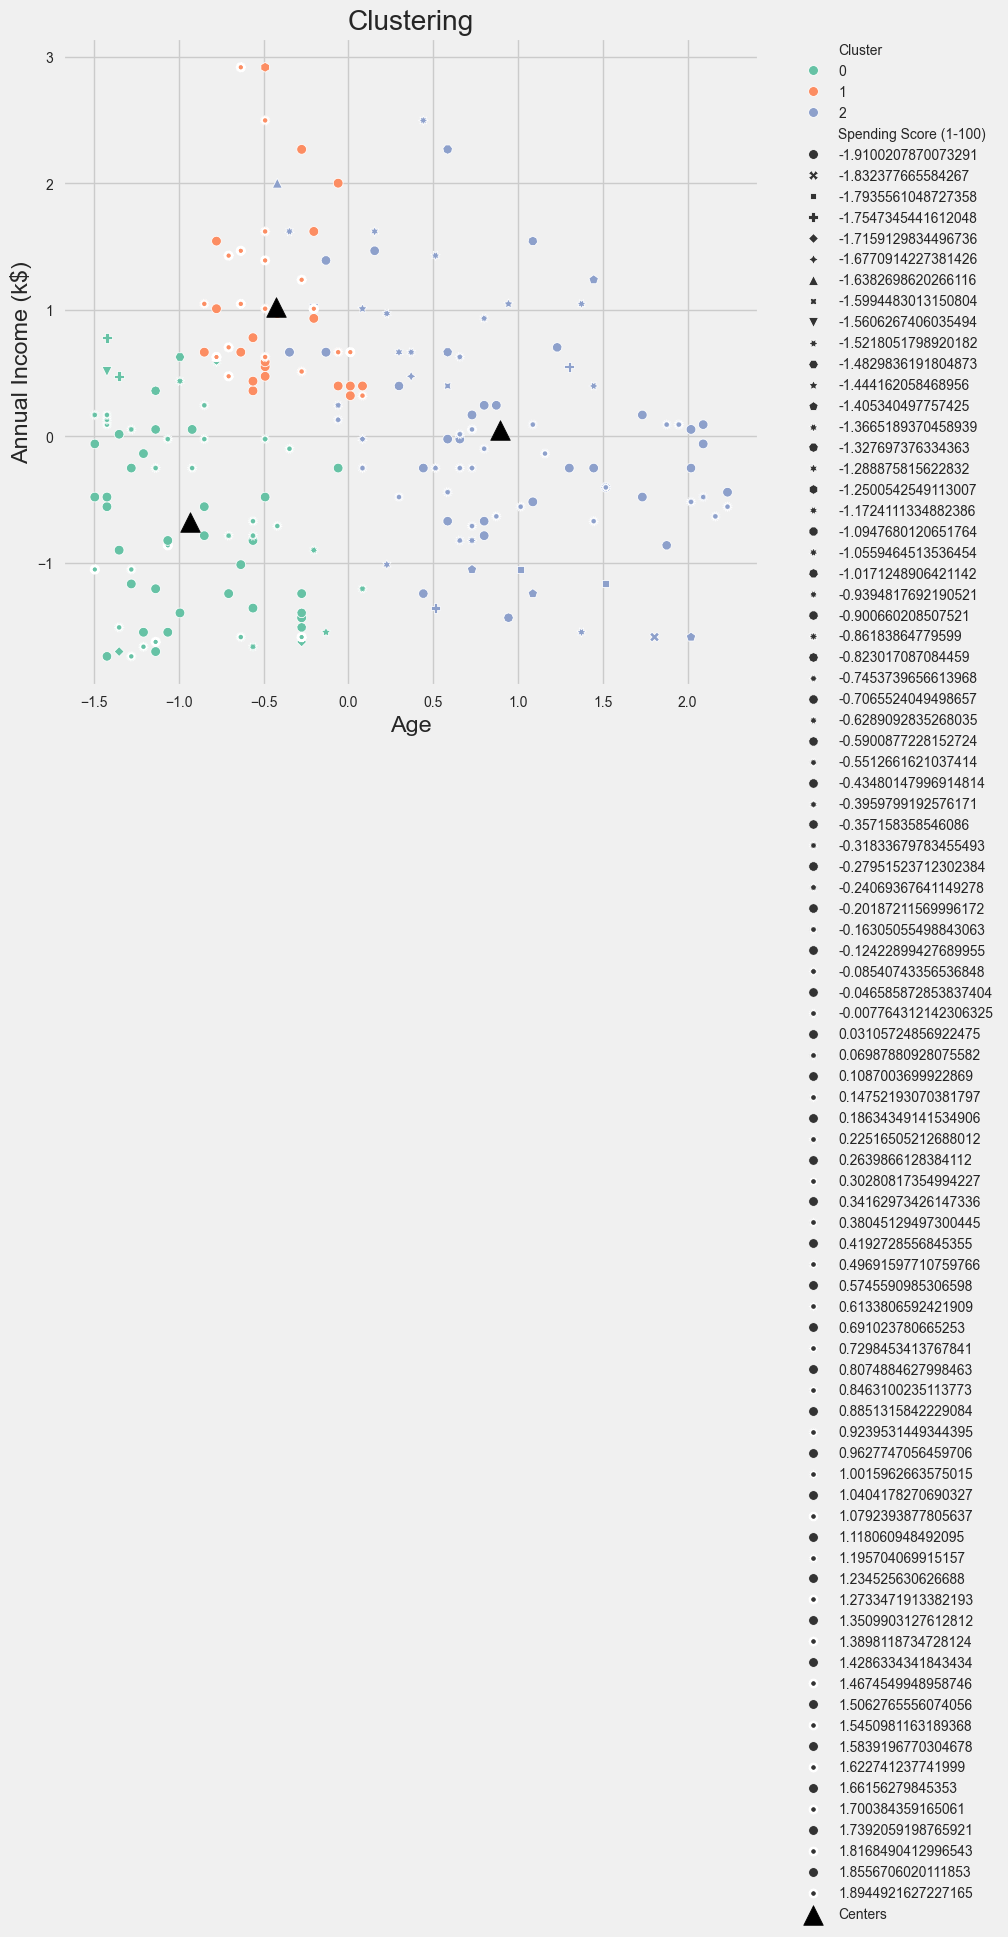

In [34]:
plt.style.use("fivethirtyeight") # 시각화 스타일 설정
plt.figure(figsize=(8, 8)) # 그래프 사이즈 설정

# scatterplot 생성
scat = sns.scatterplot(
    data = df_result,     # 사용할 데이터
    x= 'Age',             # x축 변수
    y= 'Annual Income (k$)', #y축 변수
    #z축변수수
    s=50,                 # 마커의 크기
    hue= "Cluster",       # 클러스터 레이블에 따라 색상 구분
    style="Spending Score (1-100)",        # 'Class' 정보에 따라 마커의 스타일을 다르게 표시 (옵션)
    palette="Set2"        # 색상 팔레트 설정
)

# 클러스터 중심점을 검은색 세모로 표시
plt.scatter(predicted_centers[:, 0], predicted_centers[:, 1], c='black', marker='^', s=200, label='Centers')

# 그래프 타이틀 및 범주 설정
scat.set_title("Clustering")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show() # 그래프 표시


In [47]:
#훈련데이터 설정정
X = df2.drop('Spending Score (1-100)', axis =1)
# scaler = StandardScaler()
scaled_columns = ['Age', 'Annual Income (k$)']
X[scaled_columns] = df2_sc[scaled_columns]
print(X)
y = df2_sc['Spending Score (1-100)']
print(y)

     Gender       Age  Annual Income (k$)
0         1 -1.424569           -1.738999
1         1 -1.281035           -1.738999
2         0 -1.352802           -1.700830
3         0 -1.137502           -1.700830
4         0 -0.563369           -1.662660
..      ...       ...                 ...
195       0 -0.276302            2.268791
196       0  0.441365            2.497807
197       1 -0.491602            2.497807
198       1 -0.491602            2.917671
199       1 -0.635135            2.917671

[200 rows x 3 columns]
0     -0.434801
1      1.195704
2     -1.715913
3      1.040418
4     -0.395980
         ...   
195    1.118061
196   -0.861839
197    0.923953
198   -1.250054
199    1.273347
Name: Spending Score (1-100), Length: 200, dtype: float64


In [53]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#모델설정 및 초기화화
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
#모델 학습
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
# Feature Importance 확인
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Gender: 0.047672875225543976
Age: 0.530689001083374
Annual Income (k$): 0.421638160943985


In [68]:
# 중요도 기준으로 특성 선택(평균균)
selector = SelectFromModel(model, prefit=True, threshold=0.03) 
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error,r2_score
# 선택된 특성으로 교차 검증
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # 음수로 반환해 스코어 형식에 맞춤
model_selected = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
cv_scores = cross_val_score(model_selected, X_train, y_train, cv=5, scoring=mse_scorer)

In [70]:
# 교차 검증 결과 출력
print("cv_score:", -cv_scores)  # 음수를 원래 값으로 변환
print("Mean MSE from CV:", -np.mean(cv_scores))

cv_score: [1.09353823 1.19852627 0.98445674 0.44194552 0.86396701]
Mean MSE from CV: 0.9164867534971041


In [71]:
# 선택된 특성으로 모델 재학습 및 평가
model_selected = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model_selected.fit(X_train_selected, y_train)
y_pred = model_selected.predict(X_test_selected)

In [72]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse:", mse)
print("r2_score", r2)

mse: 0.8565431769843517
r2_score -0.15224541560428406


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE를 음수로 반환

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [74]:
# GridSearchCV 실행
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [75]:
# 최적의 파라미터와 점수 출력
print("최적파라미터터:", grid_search.best_params_)
print("최적파라미터스코어:", grid_search.best_score_)

최적파라미터터: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
최적파라미터스코어: -0.719621400343941


In [76]:
# 최적의 파라미터로 모델 재학습
best_model = grid_search.best_estimator_
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

In [77]:
# 최종 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("최종 mse:", mse)
print("r2_score", r2)


최종 mse: 0.5676790447252855
r2_score 0.23634255178792973
